# 3 - RL Enviroment 
In this part we are going to build the most essential Enviroment to create a RL  Pipeline.

The first framework that we are going to use is the  **RAY**

We are going to  pass either a string name or a Python class to specify an environment.  In particular we are going to choose the simplest local enviroment.

Custom env classes passed directly to the algorithm must take a single env_config parameter in their constructor:



### Example 1 - Gym + Ray

In [1]:
import gym, ray
from gym import spaces
from ray.rllib.algorithms import ppo

In [2]:
class MyEnv(gym.Env):
    def __init__(self, env_config=None):
       # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(5)      #<gym.Space>
        self.observation_space = spaces.Discrete(2) #<gym.Space>
    
    def reset(self):
        state = 0
        #return <obs>
        return state
                           
    def step(self, action):

        # if we took an action, we were in state 1
        state = 1
    
        if action == 2:
            reward = 1
        else:
            reward = -1
            
        # regardless of the action, game is done after a single step
        done = True

        info = {}
        # return <obs>, <reward: float>, <done: bool>, <info: dict>
        return state, reward, done, info   

Python 3.8.x
ray 1.0
tensorflow 2.3.1
tensorflow-probability 0.11
gym 0.17.3
pygame 2.0.0

numpy==1.23.1

In [3]:
ray.shutdown()
ray.init()
#algo = ppo.PPO(env=MyEnv, config={"env_config": {},  # config to pass to env class
#})
algo = ppo.PPO(env=MyEnv,config={"num_workers": 4})

2023-02-05 12:16:49,112	INFO worker.py:1538 -- Started a local Ray instance.
2023-02-05 12:16:52,122	WARNING deprecation.py:47 -- DeprecationWarning: `algo = Algorithm(env='<class '__main__.MyEnv'>', ...)` has been deprecated. Use `algo = AlgorithmConfig().environment('<class '__main__.MyEnv'>').build()` instead. This will raise an error in the future!
2023-02-05 12:16:52,123	INFO algorithm_config.py:2503 -- Your framework setting is 'tf', meaning you are using static-graph mode. Set framework='tf2' to enable eager execution with tf2.x. You may also then want to set eager_tracing=True in order to reach similar execution speed as with static-graph mode.
2023-02-05 12:16:52,165	INFO algorithm.py:501 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(RolloutWorker pid=17244) 2023-02-05 12:16:57,919	WARNING env.py:147 -- Your env doesn't have a .spec.max_episode_steps attribute. This is fine if you have set 'horizon' in your 

In [4]:
mean_ppo = []
for _ in range(5):

    result = algo.train()
    print("episode reward mean:", _, result['episode_reward_mean'])
    mean_ppo.append(result['episode_reward_mean'])

episode reward mean: 0 -0.592
episode reward mean: 1 -0.1035
episode reward mean: 2 0.1895
episode reward mean: 3 0.591
episode reward mean: 4 0.7615


In [7]:
import matplotlib.pyplot as plt
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [8]:
xs = [x for x in range(len(mean_ppo))]

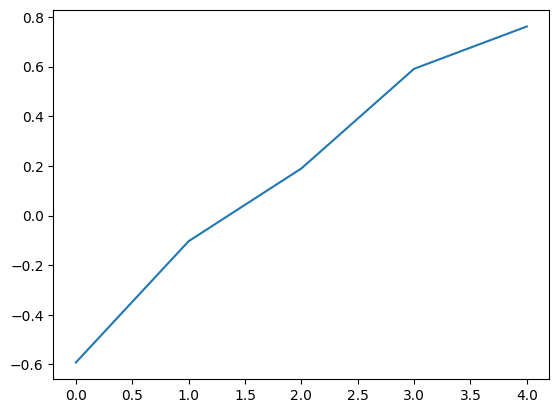

In [9]:
plt.plot(xs, mean_ppo)
plt.show()

It is possible to add additional setup to the config file

In [9]:
from ray.rllib.algorithms.ppo import PPOConfig
config = PPOConfig()  
config = config.training(gamma=0.9, lr=0.01, kl_coeff=0.3)  
config = config.resources(num_gpus=0)  
config = config.rollouts(num_rollout_workers=4)
algo = ppo.PPO(env=MyEnv, config=config) 

2023-02-05 01:24:16,487	WARNING deprecation.py:47 -- DeprecationWarning: `algo = Algorithm(env='<class '__main__.MyEnv'>', ...)` has been deprecated. Use `algo = AlgorithmConfig().environment('<class '__main__.MyEnv'>').build()` instead. This will raise an error in the future!
(pid=12660) C:\Users\rusla\.conda\envs\gym\lib\site-packages\win32\lib\pywintypes.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
(pid=12660)   import imp, sys, os
(pid=19940) C:\Users\rusla\.conda\envs\gym\lib\site-packages\win32\lib\pywintypes.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
(pid=19940)   import imp, sys, os
(pid=27916) C:\Users\rusla\.conda\envs\gym\lib\site-packages\win32\lib\pywintypes.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
(pid=27916)   i

In [10]:
mean_ppo = []
for _ in range(10):

    result = algo.train()
    print("episode reward mean:", _, result['episode_reward_mean'])
    mean_ppo.append(result['episode_reward_mean'])

episode reward mean: 0 -0.6125
episode reward mean: 1 -0.133
episode reward mean: 2 0.1735
episode reward mean: 3 0.533
episode reward mean: 4 0.705
episode reward mean: 5 0.7445
episode reward mean: 6 0.764
episode reward mean: 7 0.8955
episode reward mean: 8 0.919
episode reward mean: 9 0.9695


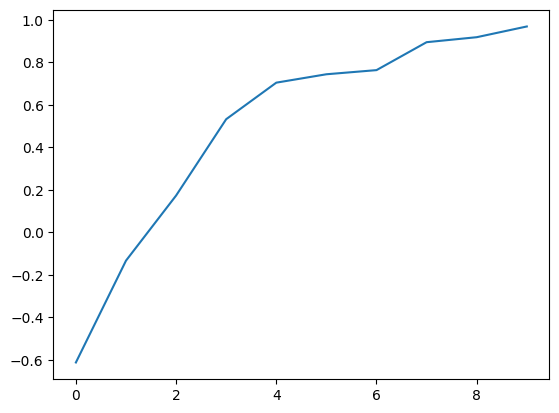

In [11]:
import matplotlib.pyplot as plt
xs = [x for x in range(len(mean_ppo))]
plt.plot(xs, mean_ppo)
plt.show()



from ray import tune
tune.run(
    "SAC", # reinforced learning agent
    name = "Training1",
    checkpoint_freq = 100,
    checkpoint_at_end = True,
    local_dir = r'./ray_results/',
    config={
        "env": MyEnv,
        "num_workers": 30,
        "num_cpus_per_worker": 0.5,
        "env_config":{
            "max_steps": 100,
            "export_frames": False,
            "export_states": False,
            # "reward_mode": "continuous",
            # "env_flipped": True,
            # "env_flipmode": True,
            }
        },
    stop = {
        "timesteps_total": 5_000,
        },
    )

### How to use the trained algorithm in RL with PP0

In [ ]:
trainer=algo

In [ ]:
checkpoint = trainer.save()

In [ ]:
print(checkpoint)

In [ ]:
#TODO Fix the windows path
#evaluation = trainer.evaluate(checkpoint)

## Computing actions

In [ ]:
env = MyEnv()

In [ ]:
done = False
total_reward = 0

In [ ]:
observations = env.reset()

In [ ]:
print(observations) # The state which you should determine the action

Given any state compute the action which you get the maximum reward in according to the traning 

In [ ]:
action = trainer.compute_single_action(observations)

In [ ]:
action

In [ ]:
while not done:
    action = trainer.compute_single_action(observations)
    observations, reward, done, info = env.step(action)
    total_reward += reward
    print("observations, reward, done, info",observations, reward, done, info)


In [ ]:
action = trainer.compute_actions({"obs_1": observations, "obs_2": observations})
print(action)
# {'obs_1': 0, 'ob

In the following rl test we are going to use  stable_baselines3

In [1]:
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv

In [2]:
import os
import time
import pygame
from pygame.surfarray import array3d
import matplotlib.pyplot as plt

pygame 2.1.2 (SDL 2.0.18, Python 3.8.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
from stable_baselines3.common.env_checker import check_env
env = MyEnv()
check_env(env)

In [ ]:
models_dir = f"models/{int(time.time())}/"
logdir = f"logs/{int(time.time())}/"

fps_controller = pygame.time.Clock()
fps_controller.tick(60)

# Checks for errors encountered
pygame.init()

# Initialise game window
pygame.display.set_caption('Training')

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

if not os.path.exists(logdir):
    os.makedirs(logdir)


env = DummyVecEnv([lambda: Monitor(MyEnv(),logdir,allow_early_resets=True)])

model = PPO("MlpPolicy", env,verbose=1, tensorboard_log=logdir,n_epochs=10)

TIMESTEPS = 100
iters = 0

obs = env.reset()
while True:
    iters += 1
    model.learn(total_timesteps=TIMESTEPS, reset_num_timesteps=False, tb_log_name=f"PPO")
    model.save(f"{models_dir}/{TIMESTEPS*iters}")

In the following example we are interested to include pygame

### Example 2 - Gym + Ray + Pygame

In order to create an appropiate gym enviroment applied to ray and pygame we need need to pay attention into two gym objects:

-- action (object): The action to be performed in the step() function. 
In a game of chess, the action would be the specific, legal move performed by a player.

--observation (object): This is all the information available to the agent to choose the next action. 
The observation is based only on the current state of the environment.

## Observation_space and Action_space
In  particular  the observation_space and action_space:
there are only certain actions and observations are valid in regards of a specific environment. 

To define a format, the observation_space and action_space variables need to be assigned to a respective gym.space class.

Spaces can differ in their dimensionality and their value range. Continuous and discrete spaces are both possible.

self.observation_space = <gym.space>
self.action_space = <gym.space>


We are going to consider an enviroment where there are two
points, one red and one blu. The purpose of the game is give a blue point ( worker) where intercept the red point (target)

## Definition of action space

We want to control the position of the blue point.

So the action is the position, the action are the coordinates that you provides to the enviroment

action =[x, y]

The value of each coordinate are continous and must be in the range of the size of the horizontal box

gym.spaces.Box(low=min_x., high=max_x., shape=(2,), dtype=np.float32)

# Analysis of Spaces
Before we continue le us check some examples of spaces in order to understand how it works.

## Box

Box - Supports continuous (and discrete) vectors or matrices, used for vector observations, images, etc



In [ ]:
from gym.spaces import Box, Discrete,MultiBinary , MultiDiscrete
import numpy as np

In [ ]:
# Example 1
observation_space = Box(low=-1.0, high=2.0, shape=(3, 4), dtype=np.float32)
print(observation_space.sample().shape)
observation_space.sample()

In [ ]:
#Example 2
observation_space = Box(low=np.array([-1.0, -2.0]), high=np.array([2.0, 4.0]), dtype=np.float32)
print(observation_space.sample().shape)
observation_space.sample()

In [ ]:
#Example 2
observation_space = Box(low=np.array(-1.0), high=np.array(2.0), dtype=np.float32)
print(observation_space.sample().shape)
observation_space.sample()

In [ ]:
# Example 1
observation_space = Box(low=0, high=200, shape=(2,), dtype=np.float32)
print(observation_space.sample().shape)
observation_space.sample()

In [ ]:
print(type(observation_space.sample()))

## Discrete

In [ ]:
#Example 3
observation_space =Discrete(2)            # {0, 1}
observation_space.sample()

In [ ]:
#Example 4
observation_space =Discrete(3)  # {0, 1, 2}
observation_space.sample()

## MultiBinary

In [ ]:
# Example 5
observation_space = MultiBinary(5)
print(observation_space.sample().shape)
observation_space.sample()

In [ ]:
# Example 5
observation_space = MultiBinary(2)
print(observation_space.sample().shape)
observation_space.sample()

# MultiDiscrete

In [ ]:
# Example 6
observation_space =  MultiDiscrete(np.array([[1, 2], [3, 4]]))
print(observation_space.sample().shape)
observation_space.sample()

# Text

In [ ]:
# Example 6a
#observation_space =Text(5)
# {"0", "42", "0123456789", ...}
#observation_space.sample()

In [ ]:
# Example 6b
#import string
#observation_space = Text(min_length = 1,
#     max_length = 10,
#     charset = string.digits)
#observation_space.sample()

# Dict
Elements of this space are (ordered) dictionaries of elements from the constituent spaces

In [ ]:
# Example 7
from gym.spaces import Dict, Discrete
observation_space = Dict({"position": Discrete(2), "velocity": Discrete(3)})
observation_space.sample()

In [ ]:
#Example 8 [nested]:
from gym.spaces import Box, Dict, Discrete, MultiBinary, MultiDiscrete
observation_space =Dict(
    {
        "ext_controller": MultiDiscrete([5, 2, 2]),
        "inner_state": Dict(
            {
                "charge": Discrete(100),
                "system_checks": MultiBinary(10),
                "job_status": Dict(
                    {
                        "task": Discrete(5),
                        "progress": Box(low=0, high=100, shape=()),
                    }
                ),
            }
        ),
    }
)

In [ ]:
type(observation_space.sample())

In [ ]:
observation_space.sample()

In [ ]:
# Example 9
from gym.spaces import Box, Discrete
observation_space = Dict({"position": Box(-1, 1, shape=(2,)), "color": Discrete(3)})

In [ ]:
observation_space.sample()

In [ ]:
import pandas as pd

In [ ]:
df1=pd.read_csv('seats_dataset.csv')

In [ ]:
df1.head()

In [ ]:
#id  x, y z 

In [ ]:
df2 = pd.read_pickle("./employees.pkl")  

In [ ]:
df2.head()

In [ ]:
df1.head()

# Tuple

In [ ]:
# Example 10
from gym.spaces import Box, Discrete, Tuple
observation_space = Tuple((Discrete(2), Box(-1, 1, shape=(2,))))
observation_space.sample()

# Sequence

In [ ]:
# Example 11
#from gym.spaces import Sequence
#space = Sequence(Box(0, 1))
#space.sample()

for futher information visit
https://gymnasium.farama.org/api/spaces/composite/#gymnasium.spaces.Dict

# ---- Summary---

Discrete - Supports a single discrete number of values with an optional start for the values

MultiDiscrete - Supports single or matrices of binary values, used for holding down a button or if an agent has an object

MultiBinary - Supports multiple discrete values with multiple axes, used for controller actions

Text - Supports strings, used for passing agent messages, mission details, etc

Composite Spaces
Often environment spaces require joining fundamental spaces together for vectorised environments, separate agents or readability of the space.

Dict - Supports a dictionary of keys and subspaces, used for a fixed number of unordered spaces

Tuple - Supports a tuple of subspaces, used for multiple for a fixed number of ordered spaces

Sequence - Supports a variable number of instances of a single subspace, used for entities spaces or selecting a variable number of actions

Graph - Supports graph based actions or observations with discrete or continuous nodes and edge values.


Example: if we want to build an observation of a PNG image , you can use the follow:


    # The action and observation spaces need to be gym.spaces objects:
    self.action_space = Discrete(4)  # up, left, right, down
    # Here's an observation space for 200 wide x 100 high RGB image inputs:
    self.observation_space = Box(
        low=0, high=255, shape=(100, 200, 3), dtype=np.uint8)

The standard structure of the ray  enviroment 
https://docs.ray.io/en/latest/rllib/rllib-env.html
should be:

import gym, ray
from ray.rllib.algorithms import ppo

class MyEnv(gym.Env):
    def __init__(self, env_config):
        self.action_space = <gym.Space>
        self.observation_space = <gym.Space>
    def reset(self):
        return <obs>
    def step(self, action):
        return <obs>, <reward: float>, <done: bool>, <info: dict>

ray.init()
algo = ppo.PPO(env=MyEnv, config={
    "env_config": {},  # config to pass to env class
})

while True:
    print(algo.train())
    
    
    
https://docs.ray.io/en/latest/rllib/rllib-algorithms.html?highlight=%20APPOConfig()#appo    

In [1]:
import torch
torch.cuda.is_available()
#https://github.com/ray-project/ray/issues/17397



In [1]:
import gym
from gym import spaces
import numpy as np
import pygame
from pygame import display
from pygame.surfarray import array3d
import random

BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)
worker_pos=[0,0]

resolution=50

class MyEnv(gym.Env):
    
    metadata = {'render.modes': ['human']}

    def __init__(self, env_config):

        # We inizialize the display
        self.frame_size_x = resolution
        self.frame_size_y = resolution
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))   
        
        # Define action and observation space
        # They must be gym.spaces objects    
            
        # ------------------ACTION SPACE----------------------------------
        # The action space are the possible actions that is allowed by the worker
        # previously was a simple number 
        # self.action_space = spaces.Discrete(1)
        # Now in this example a simple action is a single coordinates (x,y)      
        self.action_space = gym.spaces.Box(low=0, high=resolution, shape=(2,), dtype=np.int32)#dtype=np.float32) 
        
        
        # ------------------OBSERVATION SPACE-------------------------------
        # Is what the state  is observed
        #Previously was a single number discrete
        #self.observation_space = gym.spaces.Discrete(2)
        # For this example we choose a numpy array   shape=(2,) or an image
        # Attention!!! The observation space should have the same shape that the reset 
        # In order to perform the RL training otherwise will fail!!
       
        self.observation_space = spaces.Box(low=0, high=resolution,
                                            shape=(2,), dtype=np.int32) #np.float32) 
        '''
        self.observation_space = gym.spaces.Dict(
            {"x_position": gym.spaces.Box(low=0, high=6, shape=(1,), dtype=np.uint8),
             "y_position": gym.spaces.Box(low=0, high=6, shape=(1,), dtype=np.uint8),
             }
        )
        '''
        
        # Initial conditions
        
        self.game_window.fill(WHITE)
        # Moreover we add a position in the screen display
        
        # Initial worker position
        self.worker_pos=[0,0]
        
    
        #We assing a kind of gym object to a circle 
        self.worker_rect=pygame.draw.circle(self.game_window,BLUE,(self.worker_pos[0], self.worker_pos[1]),6) # DRAW CIRCLE

        # Initial target position
        
        self.target_pos = [int(resolution/2), int(resolution/2)]
        print('Initial target position',self.target_pos[0],self.target_pos[1])
        self.target_rect=pygame.draw.circle(self.game_window,RED,(self.target_pos[0], self.target_pos[1]),6) # DRAW CIRCLE
        self.steps = 0

    def reward_value(self,worker,target):
         #Check for collision between two rects
        if worker.colliderect(target):
            #print("worker, target",worker, target)
            reward=1.0
            done=True    
        else:
            reward=-1.0
            done=False
        return reward
              
    def step(self, action):
        #reward = 0.0
        
        self.worker_pos = action
        #print('worker_pos:'self.worker_pos)
            
        # We update the state with an image ( in other words plot the points due to the action)
        self.update_game_state()

        #print(self.worker_rect,self.target_rect)
        
        reward= self.reward_value(self.worker_rect,self.target_rect)
 
        # regardless of the action, game is done after step becomes true
        reward_tmp, done = self.game_over(reward)
        
        #self.reward=self.reward+reward_tmp
        self.reward=reward_tmp
        info = {}        
        
        #Accumulative reward
        #print('Reward in step:',self.steps,self.reward)
        
        # -----Under the assuption that we deal with an image---
        #img = self.get_image_array_from_game()
        #state=img
        #--------------------------------------------------------
        self.state=[self.target_pos[0], self.target_pos[1]]

        #print('step:', self.steps)
        self.steps += 1
        
        observation = np.array(self.state, dtype=np.int32) #float32)
        return observation, self.reward, done, info
    
    def worker_step(self,event):   
        '''
        Takes human keyboard event and then returns it as an action string
        '''
        action = None
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
            
        #Move based on mouse clicks
        if event.type == pygame.MOUSEBUTTONDOWN:
            #print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]
            self.worker_pos[0]=mouse_x
            self.worker_pos[1]=mouse_y
            action = [self.worker_pos[0], self.worker_pos[1]]
        #Drag the object when the mouse button is clicked
        
        if event.type == pygame.MOUSEMOTION and event.buttons[0] == 1:
            #print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]
            self.worker_pos[0]=mouse_x
            self.worker_pos[1]=mouse_y
            action = [self.worker_pos[0], self.worker_pos[1]]   
        
        elif event.type == pygame.KEYDOWN:
            # Esc -> Create event to quit the game
            if event.key == pygame.K_ESCAPE:
                pygame.event.post(pygame.event.Event(pygame.QUIT))                
        
        return  action    
    
    def update_game_state(self):
        
        #We fill the screen to white
        self.game_window.fill(WHITE)
        
        #Draw rectangles to represent the rect's of each object
        # For the worker
        
        self.worker_rect.x=self.worker_pos[0]
        self.worker_rect.y=self.worker_pos[1]
        self.worker_rect=pygame.draw.circle(self.game_window,BLUE,(self.worker_rect.x,self.worker_rect.y),6) # DRAW CIRCLE
        
        # For the target
        self.target_rect.x=self.target_pos[0]
        self.target_rect.y=self.target_pos[1]        
        pygame.draw.circle(self.game_window,RED,(self.target_rect.x,self.target_rect.y),6) # DRAW CIRCLE


    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
    
    def reset(self):
        
        # Type 1 Observation
        #print('Target position',self.target_pos[0], self.target_pos[1])
        #observation = np.array([self.target_pos[0], self.target_pos[1]])
        
        #Type 2 Observation
        #We create a simple observation state from a sample
        #self.state = self.observation_space.sample()
        #observation = np.array(self.state, dtype=np.int32) #float32)

        #Type 2 From a random sit
        #sit_random = np.random.randint(1, 9)
        #self.state['x_position'][sit_random:] = 0
        #self.state['y_position'][sit_random:] = 0
        #observation = self.state
        
        #Type 4 From a target
        self.state=[self.target_pos[0], self.target_pos[1]]        
        observation = np.array(self.state, dtype=np.int32) #float32)       
        
        # Type 3 Observation
        #img = array3d(display.get_surface())
        #img = np.swapaxes(img, 0, 1)
        #observation=img
        
        self.steps = 0
        self.reward = 0

        #print("Game Reset.")
        #print('observation',observation)
        return observation    
    
    def render(self, mode='human'):
        if mode == "human":
            display.update()        
    def close(self):
        pass
    
    def game_over(self, reward):
        if (reward < 1) or (self.steps >= 1000): 
            return -1, False
        else:
            return reward, True

pygame 2.1.2 (SDL 2.0.18, Python 3.8.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Ray testing

In [2]:
config={"env_config": {},}  # config to pass to env class

In [3]:
import gym, ray
from ray.rllib.algorithms import ppo
ray.shutdown()
ray.init()
algo = ppo.PPO(env=MyEnv, config=config
)

2023-02-05 14:19:38,433	INFO worker.py:1538 -- Started a local Ray instance.
2023-02-05 14:19:41,598	WARNING deprecation.py:47 -- DeprecationWarning: `algo = Algorithm(env='<class '__main__.MyEnv'>', ...)` has been deprecated. Use `algo = AlgorithmConfig().environment('<class '__main__.MyEnv'>').build()` instead. This will raise an error in the future!
2023-02-05 14:19:41,599	INFO algorithm_config.py:2503 -- Your framework setting is 'tf', meaning you are using static-graph mode. Set framework='tf2' to enable eager execution with tf2.x. You may also then want to set eager_tracing=True in order to reach similar execution speed as with static-graph mode.
2023-02-05 14:19:41,657	INFO algorithm.py:501 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.


(RolloutWorker pid=18092) pygame 2.1.2 (SDL 2.0.18, Python 3.8.0)
(RolloutWorker pid=18092) Hello from the pygame community. https://www.pygame.org/contribute.html
(RolloutWorker pid=11132) pygame 2.1.2 (SDL 2.0.18, Python 3.8.0)
(RolloutWorker pid=11132) Hello from the pygame community. https://www.pygame.org/contribute.html
(RolloutWorker pid=11132) Initial target position 25 25
(RolloutWorker pid=18092) Initial target position 25 25


(RolloutWorker pid=11132) 2023-02-05 14:19:47,485	WARNING env.py:147 -- Your env doesn't have a .spec.max_episode_steps attribute. This is fine if you have set 'horizon' in your config dictionary, or `soft_horizon`. However, if you haven't, 'horizon' will default to infinity, and your environment will not be reset.
2023-02-05 14:19:49,879	WARNING util.py:66 -- Install gputil for GPU system monitoring.


In [4]:
mean_ppo = []
for _ in range(25):
    result = algo.train()
    ##print("episode reward mean:", _, result['episode_reward_mean'])
    mean_ppo.append(result['episode_reward_mean'])

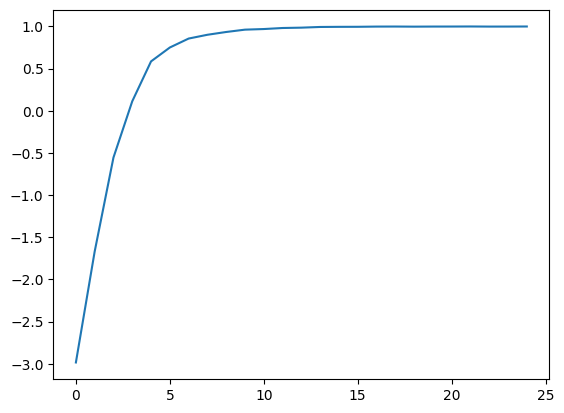

In [5]:
import matplotlib.pyplot as plt

xs = [x for x in range(len(mean_ppo))]

plt.plot(xs, mean_ppo)
plt.show()


# Testing Code

In [6]:
# method 1 - use local test class
# Testing local frame
env = MyEnv(env_config={})


Initial target position 25 25


In [7]:
test=env.reset()

In [8]:
test.shape

(2,)

In [9]:
action = env.action_space.sample()
print('action',action)

action [38  7]


In [10]:
#action=[100,100]
state, reward, done, info = env.step(action)
print("Reward = {} with action = {}".format(reward,action))
import matplotlib.pyplot as plt
print(reward, done, info)
#state = np.array(state)

print(state,type(state))
#plt.figure()
#plt.imshow(state)

Reward in step: 0 -1
Reward = -1 with action = [38  7]
-1 False {}
[25 25] <class 'numpy.ndarray'>


In [ ]:
# Testing multiple frames
import sys
env = MyEnv(env_config={})
env.reset()
# This is technically a FPS Refresh rate
FPS = 10
# FPS (frames per second) controller
fps_controller = pygame.time.Clock()
# Checks for errors encountered
check_errors = pygame.init()
# Initialise game window
pygame.display.set_caption('Testing Game') 
#The main game loop
running = True
while running:
    # Check Input from Human Step 
    for event in pygame.event.get():
        action = env.worker_step(event)    
        if event.type == pygame.QUIT:
            running = False
        pygame.display.update()
        if action != None :# (0,0) :# and reward!=0:
            #print(action,type(action))
            state, reward, done, info = env.step(action)
            print("Reward = {} with action = {} , done = {}".format(reward,action,done))
            # Refresh game screen    
    # Refresh rate
    fps_controller.tick(FPS)
    img = array3d(env.game_window)

Initial target position 25 25


# stable_baselines3

In [6]:
from stable_baselines3.common.env_checker import check_env
#env = MyEnv()
env = MyEnv(env_config={})

check_env(env)

Initial target position 25 25


C:\Users\rusla\AppData\Roaming\Python\Python38\site-packages\stable_baselines3\common\env_checker.py:361: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  warnings.warn(
C:\Users\rusla\AppData\Roaming\Python\Python38\site-packages\stable_baselines3\common\env_checker.py:372: UserWarning: Your action space has dtype int32, we recommend using np.float32 to avoid cast errors.
  warnings.warn(


In [7]:
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
import os
import time
import pygame
from pygame.surfarray import array3d
import matplotlib.pyplot as plt

In [15]:
models_dir = f"models/{int(time.time())}/"
logdir = f"logs/{int(time.time())}/"

fps_controller = pygame.time.Clock()
fps_controller.tick(60)

# Checks for errors encountered
pygame.init()

# Initialise game window
pygame.display.set_caption('Traning')

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

if not os.path.exists(logdir):
    os.makedirs(logdir)

In [16]:
envrl = DummyVecEnv([lambda: Monitor(env,logdir,allow_early_resets=True)])

In [17]:
model = PPO("MlpPolicy", env,verbose=1, tensorboard_log=logdir,n_epochs=2)
#model = PPO("MultiInputPolicy", envrl,verbose=1, tensorboard_log=logdir,n_epochs=40)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
TIMESTEPS = 100
iters = 0
obs = env.reset()
while True:
    iters += 1
    model.learn(total_timesteps=TIMESTEPS, reset_num_timesteps=False, tb_log_name=f"PPO")
    model.save(f"{models_dir}/{TIMESTEPS*iters}")